### K- Means Clustering with Elbow Method in python Step by step Guide

importing basic libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.DataFrame(np.random.random_sample((100,2)),columns= ['Feature_1','Feature_2'])
df.head()

,Feature_1,Feature_2
0,0.362636,0.580126
1,0.938421,0.894811
2,0.252271,0.531406
3,0.921964,0.719168
4,0.164118,0.057878


#### Normalizing data with help to standard Scaler

In [3]:
mms = StandardScaler()
mms.fit(df)
normalized_data = mms.transform(df)

### Applying elbow method to find best no of clusters

In [37]:
plt.figure(figsize=(8,5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

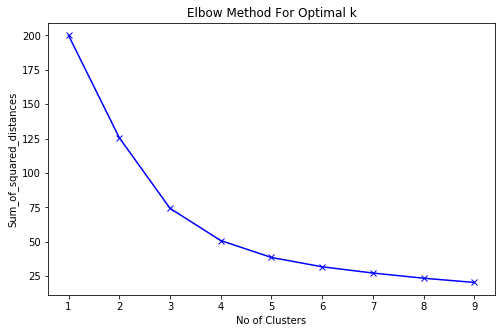

In [4]:
K = range(1,10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('No of Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Based on Elbow results taking 4 clusters

In [5]:
km = KMeans(n_clusters=4)
km = km.fit(normalized_data)

### Adding Labels to the dataset

In [6]:
df['labels'] = km.labels_
df.head()

,Feature_1,Feature_2,labels
0,0.362636,0.580126,1
1,0.938421,0.894811,2
2,0.252271,0.531406,1
3,0.921964,0.719168,2
4,0.164118,0.057878,3


### Visualizing the clusters with Box plot

as we have 2 features as random numbers the possible correct combustion of clusters are 

1.	high value of feature 1 and high value of feature 2
2.	 high value of feature 1 and low value of feature 2
3.	low value of feature 1 and high value of feature 2
4.	low value of feature 1 and low value of feature 2


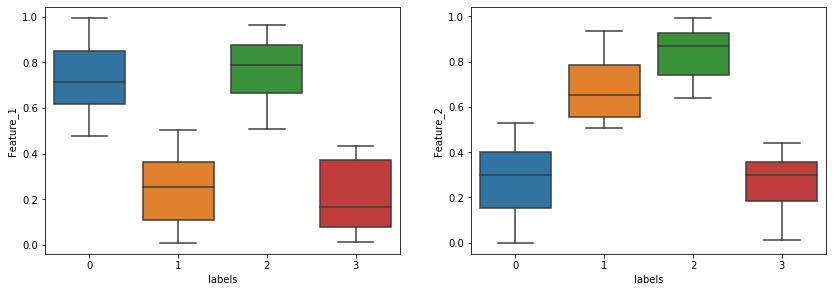

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.boxplot(x="labels", y="Feature_1", data=df)
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.boxplot(x="labels", y="Feature_2", data=df)

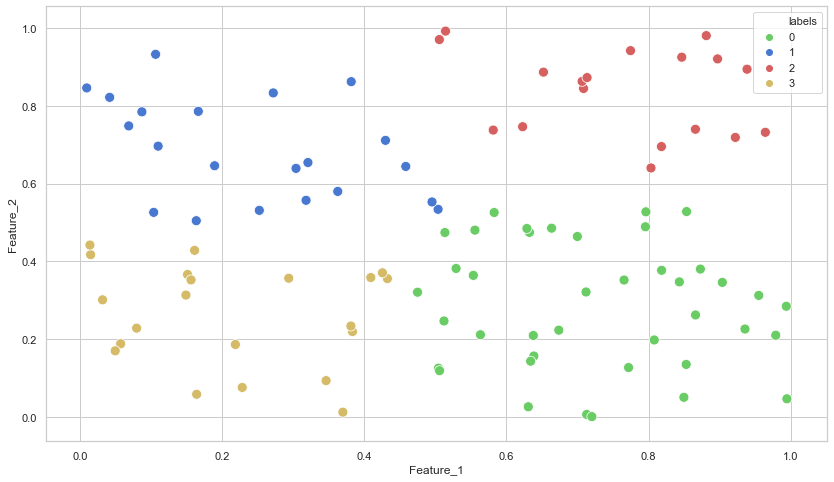

In [36]:
plt.figure(figsize=(14,8))
sns.set(style="whitegrid", palette="muted")
sns.scatterplot(x="Feature_1", y="Feature_2", hue="labels",s=100,
                     data=df,palette={0: 'g', 1 : 'b', 2 : 'r',3 : 'y'})